<a href="https://colab.research.google.com/github/rp-bot/DSP-Fundamentals/blob/master/Chapter1_(DigitalAudio)/SineWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Equal Temperament Forumla
--- 
$$
P_n = f_a \cdot 2^{\frac{n-a}{12}}
$$


\begin{align*}
a &:\text{note number for reference pitch (usually A4 : 440 hz)}\\ 
n &:\text{note number (MIDI integer range: 0 - 127)}
\end{align*}

## Example:
Find the frequency of the note 79 : (G5)
\begin{align*}
P_{79} &= 440 \cdot 2^{\frac{79-49}{12}}\\
P_{79} &= 783.99{hz}
\end{align*}

---
Typically there are many ways you can point to the same concert A4 frequency.

Everything will remain the same. Except the array pertaining to the instrument will roll over. 

So, for piano the reference pitch is indexed with the integer 49. To find any number you will subtract the reference index. 

$$\text{Example, } 49 - \textit{29} = 20$$

In [ ]:
piano_notes = np.array(np.arange(1,89))
organ_notes = np.array(np.arange(1,62))
midi_std_notes = np.array(np.arange(0,128))

Pn_piano = 440(2**((n-49)/12))

Pn_digital = 440(2**((n-69)/12))

Pn_organ = 440(2**((n-39)/12))

In [ ]:
# Calculate frequency Pn
def Pn_piano(n):
  
  # ref = 49
  return 440*(np.exp2((n-49)/12))

In [ ]:
def Pn_midi(n):
  
  # ref = 69
  return 440*(np.exp2((n-69)/12))

In [ ]:
def Pn_organ(n):
# ref = 34
  return 440*(np.exp2((n-34)/12))


---

Apply formula to get note's relative frequency.


5a9ba2ff1145195fdabb39168d4bcae71c1321ad.svg

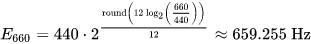

In [ ]:
def find_freq(n):
  return 440*np.exp2((np.round(12*np.log2(n/440)))/12)



---




## Standard Sampling Formula:
$$
\begin{align*}
f & : \text{frequency} \\
n & : \text{index of the sample} \\
A & : \text{amplitude} \\
\text{sr} & : \text{sampling rate}
\end{align*}
$$

$$
f(n) = A \cdot \sin\left(\frac{2\pi \cdot f \cdot n}{\text{sr}}\right)
$$


# Making the sine wave
Sn = A*sin(2πfn/sr)

A = Amplitude

f = frequency (cycles per second)

n = sample number

sr = sample rate

In [ ]:
def sine_wave(n,freq, sr=44100, amp=1):
  return amp*np.sin((2*np.pi*freq*n)/sr)

In [ ]:
duration = np.arange(44100*10+1)
duration_populated = sine_wave(duration, 440)

In [ ]:
plt.plot(duration_populated[:440])